# **Proyecto 4 - Liempieza y Visualización de Datos**

**Nombre: Hugo Fonseca**

## **Introducción**

Este proyecto busca la limpieza de datos y posterior visualización básica de distribuciones, proporciones y relaciones.La tabla sobre la cual se va a desarrollar este proyecto relación información alrededor de clientes de un banco. El desarrollo del proyecto está seccionado en la siguiente estructura:

### **Indice**



1.   Exploración inicial y limpieza de datos
2.   Visualización de distribuciones
3.   Visualización de proporciones
4.   Visualización de relaciones
5.   Analisis de correlación





## **Desarollo**

Se van a importar todas las librerias a usar en este proyecto, algunas de estaspermiten el manejo de los datos mientras que otras la visualización de los mismos en diferentes contextos.

In [80]:
# Importando Librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### **Exploración inicial y limpieza de datos**

En esta sección se realizarán los pasos estándar para explorar y limpiar los datos, de manera que se buscara entender la estructura inicial de la tabla, así mismo se identificaran y solucionaran posibles problemas relaciona al tipo de datos de cada columna, datos faltantes y duplicados. Adicionalmente, se podrán visualizar estadísticas descriptivas básicas de las columnas.

In [81]:
# Carga de Datos
df = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_2.csv')
df = df[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct']]
df.columns = [columna.lower() for columna in df.columns]

In [82]:
df.head() # 5 primeras observaciones

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28


In [83]:
df.tail() # 5 ultimas observaciones

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61


In [84]:
df.info() # informacion de la tabla 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [85]:
print(f'Numero de datos antes de eliminar Duplicados : {len(df)}')
df = df.drop_duplicates()  # Se eliminan duplicados explicitos
print(f'Numero de datos despues de eliminar Duplicados : {len(df)}')

Numero de datos antes de eliminar Duplicados : 10127
Numero de datos despues de eliminar Duplicados : 10127


In [86]:
# Se observan las respuestas de cada variable
for columna in df.columns:   
  print(columna)
  print(df[columna].unique())
  print(' ')

clientnum
[768805383 818770008 713982108 ... 716506083 717406983 714337233]
 
attrition_flag
['Existing Customer' 'Attrited Customer']
 
customer_age
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
 
gender
['M' 'F']
 
dependent_count
[3 5 4 2 0 1]
 
education_level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
 
marital_status
['Married' 'Single' 'Unknown' 'Divorced']
 
income_category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
 
card_category
['Blue' 'Gold' 'Silver' 'Platinum']
 
months_on_book
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
 
total_relationship_count
[5 6 4 3 2 1]
 
months_inactive_12_mon
[1 4 2 3 6 0 5]
 
contacts_count_12_mon
[3 2 0 1 4 5 6]
 
credit_limit
[12691.  8256.  3418. ...  5409.  5281. 10388.]
 
tot

In [87]:
# Se transforman las variables obect a category
for columna in df.select_dtypes(include='object').columns:   
  df[columna] = df[columna].astype('category')

df['dependent_count'] = df['dependent_count'].astype('category')

In [88]:
df.describe()

,clientnum,customer_age,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695
std,3.690378e+07,8.016814,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570
min,7.080821e+08,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000
25%,7.130368e+08,41.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000
50%,7.179264e+08,46.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000
75%,7.731435e+08,52.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000
max,8.283431e+08,73.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000


In [89]:
df.describe(include='category')

,attrition_flag,gender,dependent_count,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127,10127,10127
unique,2,2,6,7,4,6,4
top,Existing Customer,F,3,Graduate,Married,Less than $40K,Blue
freq,8500,5358,2732,3128,4687,3561,9436


**Concluciones Exploracion inicial y liempieza de datos** 

Las concluciones principales de esta sección son el hecho de que los datos no contiene ningún tipo de datos duplicados ni explicito ni implícito, por otro lado, tampoco hay datos faltantes, de modo que no se tuvo que realizar ningún proceso para modificar la información de la talba.

Asi mismo se cambio el tipo de algunas variables de entero a categoria, adicional se mostraron las estadisticas descriptivas tanto de las variables numericas como cateogricas, esta infromacion podra ser contrastada posterormente con la seccion de viusualización de distribuciones.



### **Visualización de Distribuciones**

En esta seccion se utilazaran histogramas para visualizar la distribucion de algunas de las variables numericaas de la tabla, tales como customer_age, credit_limit, months_on_book, entre otras.

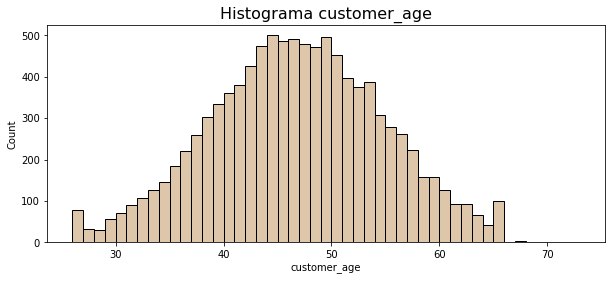

In [90]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma customer_age',fontsize=16)
sns.histplot(df,x='customer_age',color='tan')
plt.show()

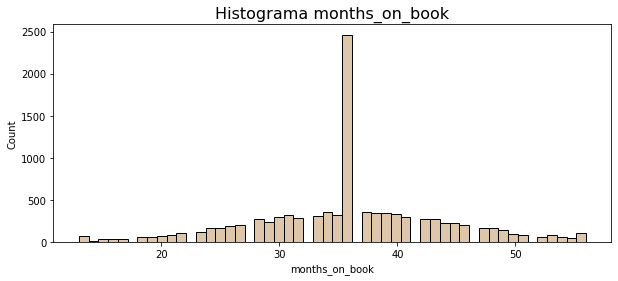

In [91]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma months_on_book',fontsize=16)
sns.histplot(df,x='months_on_book',color='tan')
plt.show()

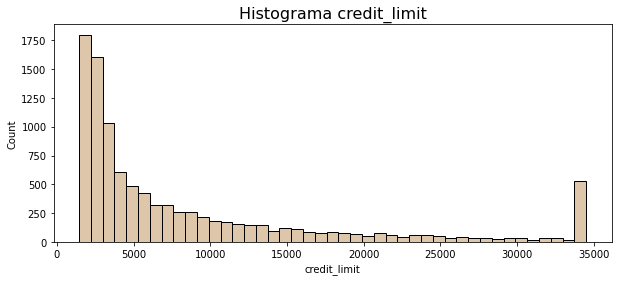

In [92]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma credit_limit',fontsize=16)
sns.histplot(df,x='credit_limit',color='tan')
plt.show()

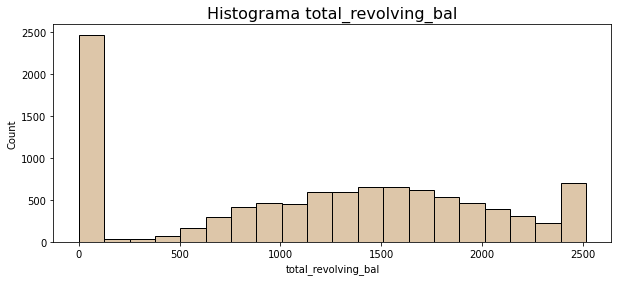

In [93]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma total_revolving_bal',fontsize=16)
sns.histplot(df,x='total_revolving_bal',color='tan')
plt.show()

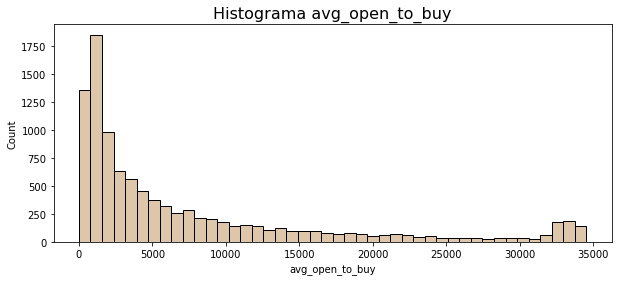

In [94]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma avg_open_to_buy',fontsize=16)
sns.histplot(df,x='avg_open_to_buy',color='tan')
plt.show()

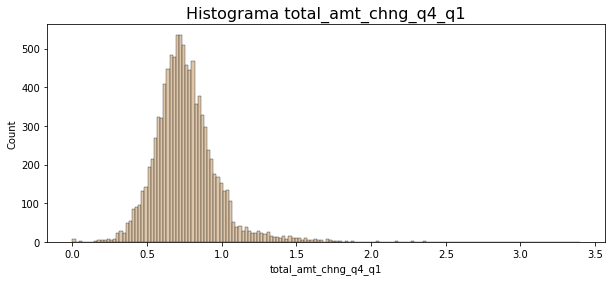

In [95]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma total_amt_chng_q4_q1',fontsize=16)
sns.histplot(df,x='total_amt_chng_q4_q1',color='tan')
plt.show()

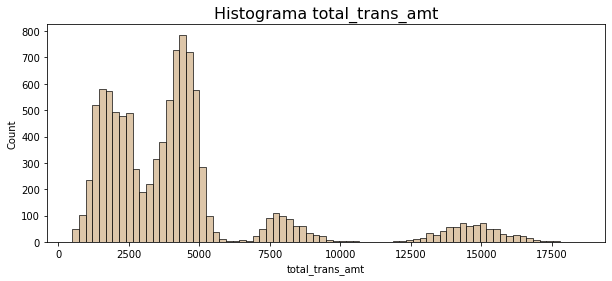

In [96]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma total_trans_amt',fontsize=16)
sns.histplot(df,x='total_trans_amt',color='tan')
plt.show()

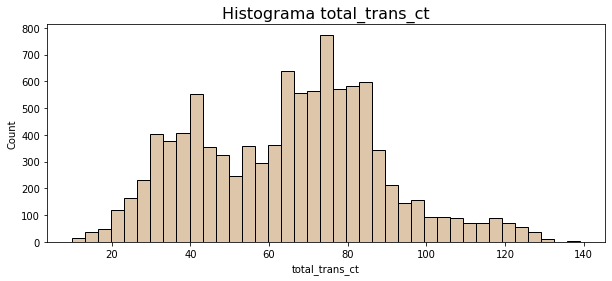

In [97]:
fig = plt.figure(figsize=(10,4))
plt.title('Histograma total_trans_ct',fontsize=16)
sns.histplot(df,x='total_trans_ct',color='tan')
plt.show()

**Concluciones viusliazación de Distribuciones**

Después de visualizar los histograma para las diferentes variables con el fin de analizar las distribuciones de cada una de esas, se pueden contrastar con la información encontrada en la primera sección al desarrollar las estadísticas descriptivas de las mismas.

De manera general se puede comentar el hecho de que varaibles como age se comporta de forma similar a una sitribucion normal, mientras que las demas si se ven sesgadas por la naturaleza de la variable en si misma, por ejemplom en el caso de las transacciones totales en atm se puede observar un comportamiento con diferentes picos, tal vez asociado con el numero de maximo de retiros dependiente del tipo de cliente que se trate. 

### **Visualización de proporciones**

En esta seccion se visualizaran las proporciones de los grupos (variables categoricas) que conforman los datos. 

In [98]:
df['frecuencia'] = 1
df.describe(include='category')

,attrition_flag,gender,dependent_count,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127,10127,10127
unique,2,2,6,7,4,6,4
top,Existing Customer,F,3,Graduate,Married,Less than $40K,Blue
freq,8500,5358,2732,3128,4687,3561,9436


In [120]:
tabla0 = pd.pivot_table(df,index=['gender'],columns='marital_status',values='frecuencia',aggfunc='sum')
tabla0 = (tabla0/len(df)) * 100
tabla0

marital_status,Divorced,Married,Single,Unknown
gender,,,,
F,3.969586,24.202627,20.983509,3.752345
M,3.416609,22.079589,17.952009,3.643725


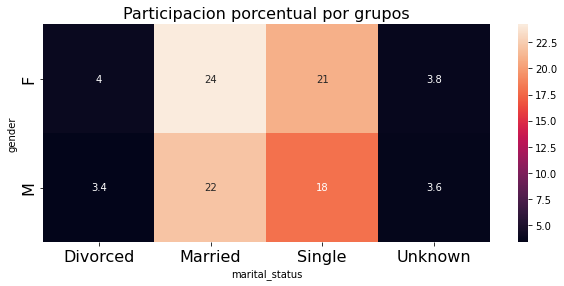

In [121]:
fig = plt.figure(figsize=(10,4))
plt.title('Participacion porcentual por grupos',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(tabla0,annot=True)
plt.show()

In [99]:
tabla1 = pd.pivot_table(df,index=['gender'],columns='education_level',values='frecuencia',aggfunc='sum')
tabla1 = (tabla1/len(df)) * 100
tabla1

education_level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
gender,,,,,,,
F,5.253283,2.537770,16.490570,10.151081,2.597018,7.860176,8.018169
M,4.749679,1.915671,14.397156,9.726474,2.498272,6.823344,6.981337


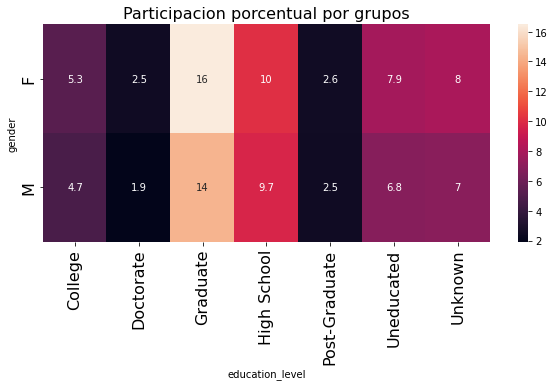

In [100]:
fig = plt.figure(figsize=(10,4))
plt.title('Participacion porcentual por grupos',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(tabla1,annot=True)
plt.show()

In [117]:
tabla2 = pd.pivot_table(df,index=['gender'],columns='income_category',values='frecuencia',aggfunc='sum')
tabla2 = (tabla2/len(df)) * 100
tabla2

income_category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
gender,,,,,,
F,0.000000,10.012837,0.000000,0.0000,32.428162,10.467068
M,7.178829,7.662684,13.844179,15.1575,2.735262,0.513479


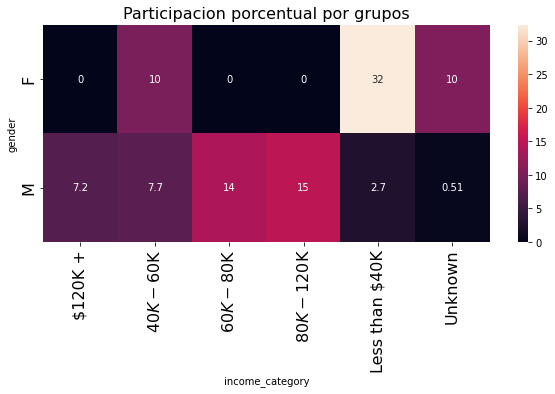

In [118]:
fig = plt.figure(figsize=(10,4))
plt.title('Participacion porcentual por grupos',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(tabla2,annot=True)
plt.show()

**Concluciones Visualizacion de Proporciones**

Dentro de esta sección primordialmente se pueden dimensionar las proporciones de participación de diferentes sub grupos creados con las categorías ofrecidas por las variables de dicho tipo en comparación al total de la muestra.

De manera que se pueden concluir ciertos aspectos interesantes, tales como que al sub dividir a los individuos por género y estado civil, el grupo con más presencia porcentual dentro del total son las mujeres casadas con un 24% seguido de los hombres casados (22%) y las mujeres solteras (21%).

Por otro lado, con respecto a sub divisiones que relacionan el género y el nivel de educación del individuo, se puede comentar que el grupo con mayor presencia porcentual dentro del total de la muestra son las mujeres graduadas con un 16%, mientras que el que menor son los hombres con doctorado con apenas un 1.9%.

Así mismo, al dividir a la población en grupos con ayuda de las variables, género y categorías de ingreso, se puede denotar que el grupo con mayor presencia porcentual son los hombres con ingresos entre los 80k - 120k.

### **Visualizacion de Relaciones**

En esta seccion se analizaran graficamente relaciones de algunas variables numericas, ademas se usaran variables categoricas para añadir infrormacion extra al analisis de estas relaciones.

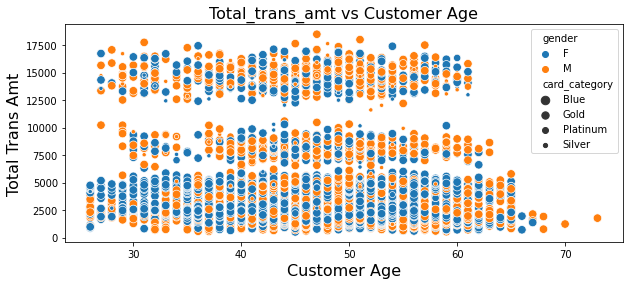

In [103]:
fig = plt.figure(figsize=(10,4))
plt.title('Total_trans_amt vs Customer Age',fontsize=16)
sns.scatterplot(y=df['total_trans_amt'],x=df['customer_age'],size=df['card_category'],hue=df['gender'])
plt.ylabel('Total Trans Amt',fontsize=16)
plt.xlabel('Customer Age',fontsize=16)
plt.show()

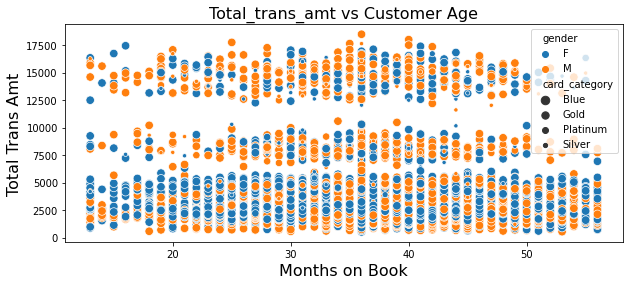

In [104]:
fig = plt.figure(figsize=(10,4))
plt.title('Total_trans_amt vs Customer Age',fontsize=16)
sns.scatterplot(y=df['total_trans_amt'],x=df['months_on_book'],size=df['card_category'],hue=df['gender'])
plt.ylabel('Total Trans Amt',fontsize=16)
plt.xlabel('Months on Book',fontsize=16)
plt.show()

**Concluciones Visualización de relaciones**

En este rápido análisis gráfico de unas posibles relaciones entre variables numéricas se buscó enfrentar a las variables de edad y months on book contras el total de transacciones realizadas en cajeros atm, además se agregó elementos gráficos adicionales que dividen a la muestra tanto por género como por la categoría de tarjeta.

Algunas conclusiones generales que deja este análisis gráfico de relaciones es que no se puede establecer a primera vista algún tipo de relación lineal o cuadrática entre las variables de edad y número de transacciones, a priori se podría pensar que la edad y el número de transacciones podrían tener una mayor relación de la que se logra ver gráficamente, lo mismo sucede en el caso que se compara al número de transacciones con la variable months on book. 

### **Analisis de Correlación**



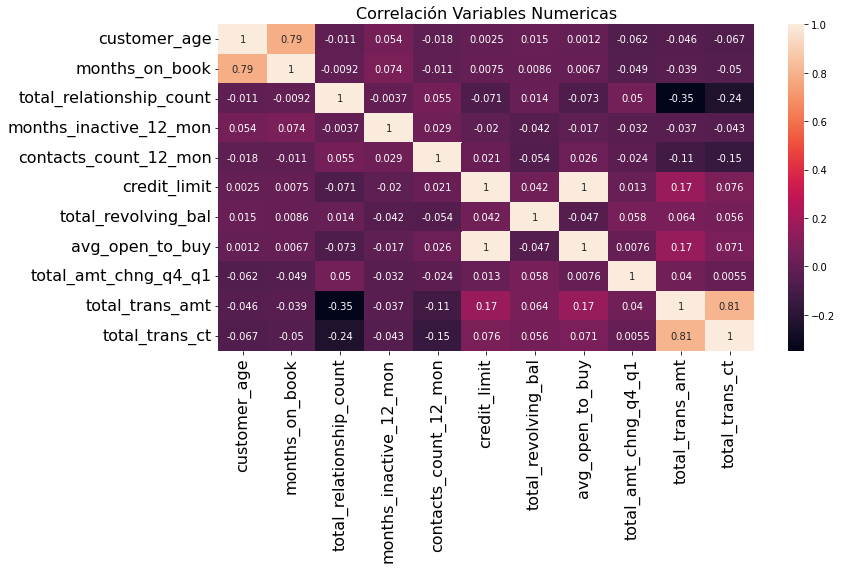

In [126]:
datos = df.select_dtypes(exclude='category').drop(columns=['clientnum','frecuencia'])
fig = plt.figure(figsize=(12,6))
plt.title('Correlación Variables Numericas',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(datos.corr(),annot=True)
plt.show()

**Concluciones Analizis de correlaciones**


En esta sección se decidió realizar un gráfico de la matriz de niveles de correlación lineal entre las variables numéricas de la tabla. El resultado de esto son algunas colusiones interesantes que en un primer momento nos permiten ratificar lo ya encontrado en la sección anterior, nótese que el nivel de relación entre las variables de edad y transacciones en amt es de -0.046, muy cercana a cero, lo cual denota la no relación entre variables, sucede lo mismo para el caso de la variable month on book.

Por otro lado, se puede comentar que la mayoría de los niveles de relación lineal entre variables es cercano a 0, los únicos casos en los que no sucede esto es entre las variables de edad y month on book (puede que sea por la naturaleza de tiempo de estas mismas) y las de transacciones en amt o ct. 

## **Concluciones Generales**

Después de realizar un rápido análisis gráfico de distribuciones, proporciones y relación, además de un estudio sobre correlaciones entre las variables de la tabla trabajada, se pudo de notar la presencia de ciertos grupos de individuos categorizados por variables como género y nivel educativo o nivel de ingresos que predominan porcentualmente frente a otros en el total de los clientes del banco. 

Así mismo se pudo observar que a priori es difícil establecer algún tipo de relación entre la variable de edad con el número de transacciones realizadas, ya sea en amt o en ct, tal vez se debería sub dividir a los individuos por rangos de edad y alguna otra categoría e intentar identificar algún tipo de relación con las variables que hacen referencia al número de transacciones.

Así mismo, en el análisis de correlación se denotó una correlación de 1 entre las variables de límite de crédito y el rango abierto para compra; sin embargo, esto se debe básicamente a la naturaleza de estas dos variables dentro del contexto bancario.

Por ultimo para posteriroes analisis de este tipo de tablas surge interesante determinar y explorar mas posibles realciones entre variables teniendo en cuenta las categorias generadas 

